In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob

In [31]:
df= pd.read_csv("data/ganjar.csv")
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 10:31:40 +0000 2023,1735608555141730048,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",0,0,0,0,in,1690610120311589888,1735608555141730048,firdaraisyaa,https://twitter.com/firdaraisyaa/status/173560...
1,1,Fri Dec 15 10:31:40 +0000 2023,1735608554323950080,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",0,0,0,0,in,1691369523004489984,1735608554323950080,zaraauliaaia,https://twitter.com/zaraauliaaia/status/173560...
2,2,Fri Dec 15 10:31:39 +0000 2023,1735608552843259904,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,0,0,0,0,in,1690492185102400000,1735608552843259904,adamalvnto1,https://twitter.com/adamalvnto1/status/1735608...
3,3,Fri Dec 15 10:31:38 +0000 2023,1735608549248719872,Mengagumi betapa Mas Ganjar mampu menjaga kese...,0,0,0,0,in,1689128132589329920,1735608549248719872,ZivaOktavia,https://twitter.com/ZivaOktavia/status/1735608...
4,4,Fri Dec 15 10:31:38 +0000 2023,1735608548602889984,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,0,0,0,0,in,1688485501551160064,1735608548602889984,dindafiitriii,https://twitter.com/dindafiitriii/status/17356...


In [32]:
df = df[["full_text", "username", "created_at"]]
df

,full_text,username,created_at
0,"Ganjar Pranowo dan Pak Mahfud MD, semoga kepem...",firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,"Ganjar Pranowo, gubernur yang bisa menjadi ins...",zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,Kebersamaan Ganjar dan Mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,Mengagumi betapa Mas Ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,Semoga Ganjar Pranowo dan Mahfud MD dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
418,Kebersamaan keluarga Mas Ganjar Pranowo adalah...,klarisasal,Fri Dec 15 10:40:18 +0000 2023
419,all in total dukung pak Ganjar Mahfud #KerjaB3...,rehannnfa,Fri Dec 15 10:40:18 +0000 2023
420,Kemesraan dalam keluarga Ganjar Pranowo adalah...,fbnachmadd,Fri Dec 15 10:40:16 +0000 2023
421,Kebersamaan Ganjar Pranowo dengan keluarganya ...,avaluna180008,Fri Dec 15 10:40:15 +0000 2023


# CLEANING DATA

In [33]:
df.shape

(423, 3)

In [34]:
# menghapus data duplikat
df = df.drop_duplicates(subset = ["full_text"])

In [35]:
#melihat jumlah data yg terduplikasi
df.duplicated().sum()

0

In [36]:
# menghapus data kosong
df = df.dropna()

In [37]:
# melihat jumlah data yg kosong
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [38]:
df.shape

(423, 3)

FUNCTION PEMBERSIHAN

In [39]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hps mentions
    text = re.sub(r'#\w+', '', text)            # Remove hashtags
    text = re.sub(r'RT[\s]+', '', text)         # Remove retweet indicators
    text = re.sub(r'https?://\S+', '', text)    # Remove URLs
    
    text = re.sub(r'[^A-Za-z0-9 ]', '', text)   # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()    # Strip extra whitespace
    
    return text

df['full_text'] = df['full_text'].apply(lambda x: clean_twitter_text(x))


In [40]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text,username,created_at
0,ganjar pranowo dan pak mahfud md semoga kepemi...,firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,ganjar pranowo gubernur yang bisa menjadi insp...,zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,kebersamaan ganjar dan mahfud sebagai tim adal...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,mengagumi betapa mas ganjar mampu menjaga kese...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,semoga ganjar pranowo dan mahfud md dapat memb...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
418,kebersamaan keluarga mas ganjar pranowo adalah...,klarisasal,Fri Dec 15 10:40:18 +0000 2023
419,all in total dukung pak ganjar mahfud,rehannnfa,Fri Dec 15 10:40:18 +0000 2023
420,kemesraan dalam keluarga ganjar pranowo adalah...,fbnachmadd,Fri Dec 15 10:40:16 +0000 2023
421,kebersamaan ganjar pranowo dengan keluarganya ...,avaluna180008,Fri Dec 15 10:40:15 +0000 2023


# PREPROCESSING


In [41]:
# normalisasi
norm = {' yg ': ' yang ', ' prabowo ': " ", ' ganjar ': " ", ' nggak ': ' tidak ', ' ngga ': ' tidak ', ' gak ': ' tidak ', ' vibes ': ' suasana '}

def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,ganjar pranowo dan pak mahfud md semoga kepemi...,firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,ganjar pranowo gubernur yang bisa menjadi insp...,zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,kebersamaan dan mahfud sebagai tim adalah kunc...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,mengagumi betapa mas mampu menjaga keseimbanga...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,semoga pranowo dan mahfud md dapat membawa sem...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023
...,...,...,...
418,kebersamaan keluarga mas pranowo adalah bukti ...,klarisasal,Fri Dec 15 10:40:18 +0000 2023
419,all in total dukung pak mahfud,rehannnfa,Fri Dec 15 10:40:18 +0000 2023
420,kemesraan dalam keluarga pranowo adalah cermin...,fbnachmadd,Fri Dec 15 10:40:16 +0000 2023
421,kebersamaan pranowo dengan keluarganya menjadi...,avaluna180008,Fri Dec 15 10:40:15 +0000 2023


# Stopword

In [42]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["tidak"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
    str_text = stop_words_remover_new.remove(str_text)
    return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,ganjar pranowo pak mahfud md semoga kepemimpin...,firdaraisyaa,Fri Dec 15 10:31:40 +0000 2023
1,ganjar pranowo gubernur bisa menjadi inspirasi...,zaraauliaaia,Fri Dec 15 10:31:40 +0000 2023
2,kebersamaan mahfud tim kunci keberhasilan mema...,adamalvnto1,Fri Dec 15 10:31:39 +0000 2023
3,mengagumi betapa mas mampu menjaga keseimbanga...,ZivaOktavia,Fri Dec 15 10:31:38 +0000 2023
4,semoga pranowo mahfud md membawa semangat kebe...,dindafiitriii,Fri Dec 15 10:31:38 +0000 2023


# Tokenize

In [43]:
tokenized = df['full_text'].apply(lambda x: x.split())
tokenized

0      [ganjar, pranowo, pak, mahfud, md, semoga, kep...
1      [ganjar, pranowo, gubernur, bisa, menjadi, ins...
2      [kebersamaan, mahfud, tim, kunci, keberhasilan...
3      [mengagumi, betapa, mas, mampu, menjaga, kesei...
4      [semoga, pranowo, mahfud, md, membawa, semanga...
                             ...                        
418    [kebersamaan, keluarga, mas, pranowo, bukti, n...
419                [all, in, total, dukung, pak, mahfud]
420    [kemesraan, keluarga, pranowo, cerminan, keber...
421    [kebersamaan, pranowo, keluarganya, menjadi, b...
422    [mahfud, md, semoga, kepedulian, kebersamaan, ...
Name: full_text, Length: 423, dtype: object

# Stemming

In [44]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do =[]
    for w in text_cleaning:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean = []    
    d_clean = " ".join(do)
    print(d_clean)
    return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("HasilPreprocessingGanjar.csv", index=False)


ganjar pranowo pak mahfud md moga pimpin kalian pancar hangat dalam keluarga gp 4presiden
ganjar pranowo gubernur bisa jadi inspirasi mampu satu seni politik gp 4presiden
sama mahfud tim kunci hasil maju indonesia gp 4presiden
kagum betapa mas mampu jaga imbang tugas pimpin peran kepala keluarga gp 4presiden
moga pranowo mahfud md bawa semangat sama dalam bijak nasional gp 4presiden
insana ntt rapat baris dukung ganjarmahfud
sukses mas pranowo pak mahfud md moga pimpin bawa indonesia puncak jaya gp 4presiden
sukses selalu mas pranowo pak mahfud md adalah tim potensi bawa maju besar jatim gp 4presiden
wah tambah tua nih selamat ulang tahun bro alam moga makin jadi pribadi keren
sukses pranowo canda bukti pimpin ceria mampu buat putus bijak gp 4presiden
jakarta butuh pimpin pranowo milik pimpin visioner nilainilai keluarga kuat gp 4presiden
kenapa buzzer ngetag gw
ganjar pranowo mahfud md sosok milik visi jalan mesra keluarga jadi nilai tambah pimpin gp 4presiden
makin yakin jatim makin 

# TRANSLATE

In [45]:
data = pd.read_csv('preprocessing/HasilPreprocessingGanjar.csv', encoding='latin1')
data.head()

,full_text
0,ganjar pranowo pak mahfud md moga pimpin kalia...
1,ganjar pranowo gubernur bisa jadi inspirasi ma...
2,sama ganjar mahfud tim kunci hasil maju indone...
3,kagum betapa mas ganjar mampu jaga imbang tuga...
4,moga ganjar pranowo mahfud md bawa semangat sa...


In [46]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

data['tweet_english'] = data['full_text'].apply(convert_eng)
data.to_csv('terjemahan/TerjemahanGanjar.csv')

# LABELING

In [57]:
data = pd.read_csv("terjemahan\TerjemahanGanjar.csv", index_col=0)
data

,full_text,tweet_english
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...
...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...


In [58]:
status = []
total_positif = total_negatif = total_netral = total = 0

for tweet in data['tweet_english']:
    analysis = TextBlob(tweet)
    sentiment = 'netral'
    
    if analysis.sentiment.polarity > 0.0:
        sentiment = 'positif'
        total_positif += 1
    elif analysis.sentiment.polarity < 0.0:
        sentiment = 'negatif'
        total_negatif += 1
    else:
        total_netral += 1
    
    status.append(sentiment)
    total += 1

print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 229
Netral = 34
Negatif = 44

Total Data : 307


In [59]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,netral
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,netral
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,netral
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...,positif
...,...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...,negatif
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...,positif
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...,positif
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...,positif


# VISUALISASI

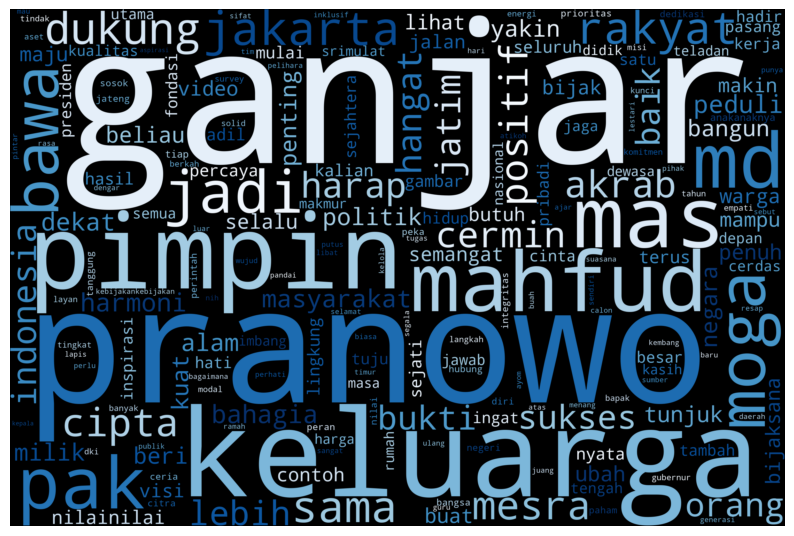

In [60]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)


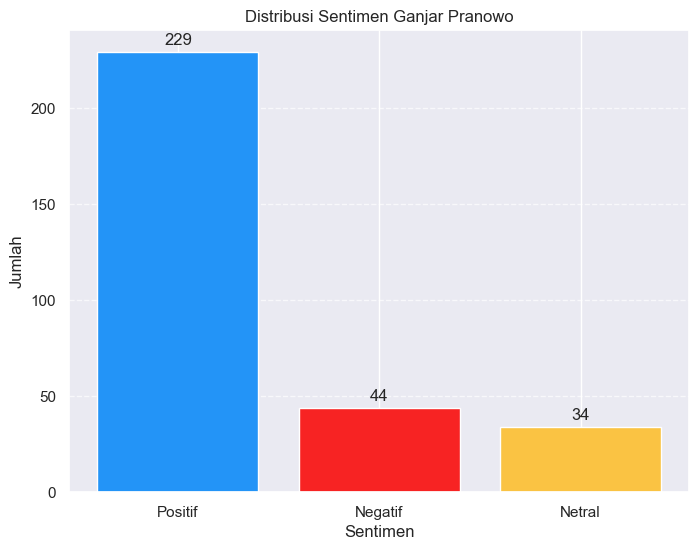

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8, 6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ganjar Pranowo")


# Splitting Data dan Konversi Teks Menjadi Fitur Numerik

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Mengonversi teks menjadi fitur numerik
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['tweet_english']).toarray()

# Mengonversi label menjadi numerik
y = data['klasifikasi'].apply(lambda x: 1 if x == 'positif' else (0 if x == 'netral' else -1))

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)


# Melatih Model Gaussian Naive Bayes dan Memprediksi Hasil

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Melatih model GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# Memprediksi set test
y_pred = model.predict(X_test)

# Mengevaluasi model
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')


Classification Report:
              precision    recall  f1-score   support

          -1       0.33      0.20      0.25         5
           0       1.00      0.00      0.00         3
           1       0.79      0.96      0.86        23

    accuracy                           0.74        31
   macro avg       0.71      0.39      0.37        31
weighted avg       0.73      0.74      0.68        31

Accuracy: 0.7419354838709677


In [64]:
data

,full_text,tweet_english,klasifikasi
0,ganjar pranowo pak mahfud md moga pimpin kalia...,eagerness pranowo pak mahfud md may lead you t...,netral
1,dukung mas ganjar pak mahfud dukung pimpin pah...,support mas ganjar pak mahfud support to lead ...,netral
2,ganjar pranowo gubernur jadi inspirasi mampu s...,ganjar pranowo governor can be an inspiration ...,positif
3,ganjar pranowo mahfud md pimpin komitmen jabat...,eagerness pranowo mahfud md lead not the commi...,netral
4,sama ganjar mahfud tim kunci hasil maju indone...,same odd mahfud key team results advanced indo...,positif
...,...,...,...
302,ganjar pranowo mahfud md bukan pimpin pintar b...,eagerness pranowo mahfud md not a wise smart l...,negatif
303,ganjar pranowo mahfud md pasang janji dekat ce...,eagerness pranowo mahfud md put up a promise n...,positif
304,dukung penuh mas ganjar pranowo pak mahfud md ...,support full mas ganjar pranowo pak mahfud md ...,positif
305,akrab mas ganjar keluarga harap perintah denga...,familiar mas ganjar family please order hear r...,positif


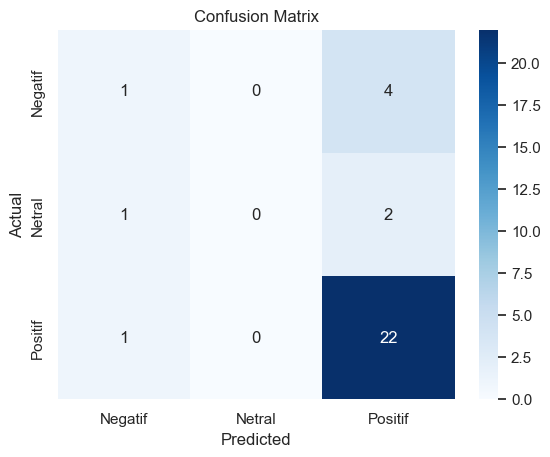

In [65]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
